# Определение перспективного тарифа для  компании «Мегалайн»
В данном проекты мы должны провести предварительный анализ двух тарифов на небольшой выборке клиентов.
Цель проекта проанализировать тарифы и определить какой из них лучше и приносит больше денег для компании.

## Шаг 1. Откроем файлы с данными и изучите общую информацию

In [16]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_messages = pd.read_csv('messages.csv')
df_users = pd.read_csv('users.csv')
df_tariffs = pd.read_csv('tariffs.csv')

In [18]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [19]:
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [20]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [22]:
df_tariffs.info()
df_tariffs.columns = ['messages_included', 'gb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']
df_tariffs['gb_per_month_included'] = df_tariffs['gb_per_month_included'].replace(15360, 15)
df_tariffs['gb_per_month_included'] = df_tariffs['gb_per_month_included'].replace(30720, 30)
df_tariffs.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Мы получили данные о пользователях:
* df_calls - данные о звонках
* df_internet  - данные о использовании интернета
* df_messages - данные о использовании смс сообщений
* df_users - данные о пользователях
* df_tariffs - данные о двух тарифах

Что следует сделать в дальнейшем:
* изменить типы данных в датасетах
* округлить кол-во минут в звонках до целых чисел в большую сторону, т.к. по тарификации оператора даже одна секунда считается минутой
* приведем даты в нужный формат, для дальнейшей работы







# Шаг 2. Подготовка  данных

In [23]:
del df_internet['Unnamed: 0']

Мы удалили столбец **Unnamed: 0**, так как он был нам не нужен

In [24]:
df_calls['id'] = df_calls['id'].astype('int')
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT')
df_internet['id'] = df_calls['id'].astype('int')
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype('int')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT')
df_messages['id'] = df_messages['id'].astype('int')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%dT')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%dT')

Мы округлили кол-во минут до целого числа, изменили типы данных в нужных столбцах. Звонки со значением ноль мы оставим, так как вероятнее всего это пропущенные звонки и звонки, когда абонент не мог дозвониться кому-нибудь. Поэтому их мы менять не будем.

**Посчитаем количество звонков и количество израсходаванных минут**

In [25]:
df_calls['month'] = df_calls['call_date'].dt.month
user_calls = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count'])\
    .reset_index()
user_calls.columns = ['user_id', 'month', 'calls_sum', 'calls_count']
user_calls.head()

,user_id,month,calls_sum,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


**Посчитаем количество израсходованного интернет трафика за месяц**

In [26]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['mb_used'] = df_internet['mb_used'] / 1024
user_internet = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum']) \
    .reset_index()
user_internet.columns = ['user_id', 'month', 'gb_sum']
user_internet.head()

,user_id,month,gb_sum
0,1000,5,2.203125
1,1000,6,22.711914
2,1000,7,13.687500
3,1000,8,13.740234
4,1000,9,14.239258


**Посчитаем количество отправленных смс сообщений за месяц**

In [27]:
df_messages['month'] = df_messages['message_date'].dt.month
user_messages = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count']) \
    .reset_index()
user_messages.columns = ['user_id', 'month', 'messages_count']
user_messages.head(5)

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Посчитаем месячную выручку с каждого пользователя**

In [28]:
df = user_calls.merge(user_internet, how='outer', on = ['user_id', 'month'] ).merge(
    user_messages, how = 'outer',on = ['user_id', 'month'])
df.head(10)

,user_id,month,calls_sum,calls_count,gb_sum,messages_count
0,1000,5,159.0,22.0,2.203125,22.0
1,1000,6,172.0,43.0,22.711914,60.0
2,1000,7,340.0,47.0,13.687500,75.0
3,1000,8,408.0,52.0,13.740234,81.0
4,1000,9,466.0,58.0,14.239258,57.0
5,1000,10,350.0,57.0,14.372070,73.0
6,1000,11,338.0,43.0,14.421875,58.0
7,1000,12,333.0,46.0,9.596680,70.0
8,1001,11,430.0,59.0,18.019531,NaN
9,1001,12,414.0,63.0,13.723633,NaN


In [29]:
df = df.merge(df_users, how='left', on='user_id').merge(df_tariffs, on='tariff', how='left')
df.head(5)

,user_id,month,calls_sum,calls_count,gb_sum,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2.203125,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,172.0,43.0,22.711914,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,340.0,47.0,13.687500,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,408.0,52.0,13.740234,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,466.0,58.0,14.239258,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1


In [30]:
df.isna().mean()

user_id                  0.000000
month                    0.000000
calls_sum                0.012446
calls_count              0.012446
gb_sum                   0.003423
messages_count           0.154636
age                      0.000000
churn_date               0.941817
city                     0.000000
first_name               0.000000
last_name                0.000000
reg_date                 0.000000
tariff                   0.000000
messages_included        0.000000
gb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
dtype: float64

In [31]:
df['calls_count'] = df['calls_count'].fillna(0)
df['calls_sum'] = df['calls_sum'].fillna(0)
df['gb_sum'] = df['gb_sum'].fillna(0)
df['messages_count'] = df['messages_count'].fillna(0)

In [32]:
df.isna().mean()

user_id                  0.000000
month                    0.000000
calls_sum                0.000000
calls_count              0.000000
gb_sum                   0.000000
messages_count           0.000000
age                      0.000000
churn_date               0.941817
city                     0.000000
first_name               0.000000
last_name                0.000000
reg_date                 0.000000
tariff                   0.000000
messages_included        0.000000
gb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
dtype: float64

При объединении у нас появились пропущенные значения, они означали, что абоненты не использовали ни звонки, ни интренет, ни смс сообщения. Поэтому мы заменили их на ноль.

In [33]:
df.duplicated().sum()

0

Провериди на наличие дубликатов, возможно всякое.

In [34]:
df['gb_sum'] = np.ceil(df['gb_sum']).astype(int)
df.head(10)

,user_id,month,calls_sum,calls_count,gb_sum,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,3,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,172.0,43.0,23,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,340.0,47.0,14,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,408.0,52.0,14,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,466.0,58.0,15,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
5,1000,10,350.0,57.0,15,73.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
6,1000,11,338.0,43.0,15,58.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
7,1000,12,333.0,46.0,10,70.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
8,1001,11,430.0,59.0,19,0.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15,500,550,200,3,3
9,1001,12,414.0,63.0,14,0.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15,500,550,200,3,3


In [35]:
def price_tariff(row):
    sms = (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    calls = (row['calls_sum'] - row['minutes_included']) * row['rub_per_minute']
    gb = (row['gb_sum'] - row['gb_per_month_included']) * row['rub_per_gb']
    total = 0
    for count in [sms, calls, gb]:
        if count > 0:
            total += count
    return total


In [36]:
df['optional_income'] = df.apply(lambda x: price_tariff(x), axis=1)
df['income'] = df['optional_income'] + df['rub_monthly_fee']

In [37]:
display(df.head(5), df.tail(5))

,user_id,month,calls_sum,calls_count,gb_sum,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,optional_income,income
0,1000,5,159.0,22.0,3,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.0,1950.0
1,1000,6,172.0,43.0,23,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.0,1950.0
2,1000,7,340.0,47.0,14,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.0,1950.0
3,1000,8,408.0,52.0,14,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.0,1950.0
4,1000,9,466.0,58.0,15,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.0,1950.0


,user_id,month,calls_sum,calls_count,gb_sum,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,optional_income,income
3209,1489,8,0.0,0.0,11,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3,0.0,550.0
3210,1489,9,0.0,0.0,17,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3,400.0,950.0
3211,1489,10,0.0,0.0,20,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3,1000.0,1550.0
3212,1489,11,0.0,0.0,18,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3,600.0,1150.0
3213,1489,12,0.0,0.0,17,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3,400.0,950.0


# Шаг 3. Проанализируем данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [38]:
ultra = df.query('tariff == "ultra"')
smart = df.query('tariff == "smart"')

In [39]:
print('Кол-во строк в ultra:', len(ultra))
print('Кол-во строк в smart:', len(smart))

Кол-во строк в ultra: 985
Кол-во строк в smart: 2229


Для дальнейшего анализа, мы разделили наш датасет на две части по тарифам.

,mean
,calls_sum
count,350.000000
mean,419.634803
std,145.031543
min,0.000000
25%,316.886364
50%,425.062500
75%,519.508333
max,891.500000


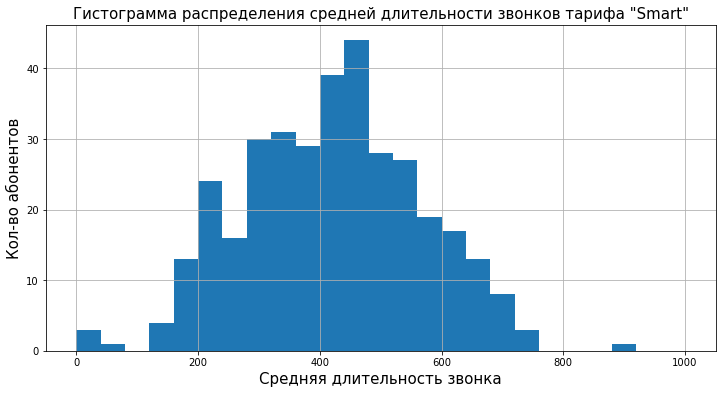

,mean
,calls_sum
count,148.000000
mean,527.821819
std,281.786359
min,0.000000
25%,325.437500
50%,514.541667
75%,746.972222
max,1179.363636


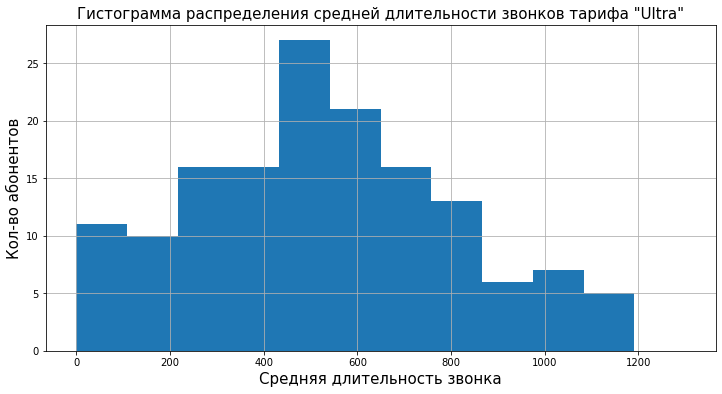

In [40]:
smart_mean_calls = smart.pivot_table(index = 'user_id', values = 'calls_sum', aggfunc = ['mean'] )
display(smart_mean_calls.describe())
smart_mean_calls.hist(bins=25, range=(0, 1000), figsize=(12, 6))
plt.title('Гистограмма распределения средней длительности звонков тарифа "Smart"', loc='center', fontsize = '15')
plt.xlabel('Средняя длительность звонка', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_mean_calls = ultra.pivot_table(index = 'user_id', values = 'calls_sum', aggfunc = ['mean'] )
display(ultra_mean_calls.describe())
ultra_mean_calls.hist(bins=12, range=(0, 1300), figsize=(12, 6))
plt.title('Гистограмма распределения средней длительности звонков тарифа "Ultra"', loc='center', fontsize = '15')
plt.xlabel('Средняя длительность звонка', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

Абоненты тарифа **smart** в среднем используют 420 минут, также у нас есть выбросы некоторые абоненты не пользуются звонками, и есть выброс около 900 минут. В большинстве случаев абонты тарифа **smart** не выходят за рамки тарифа.
А вот абоненты тарифа **ultra** удивляют, ни один пользователь не воспользовался даже половиной своего лимита на звонки. В среднем абоненты этого тарифа используют всего 550 минут из своего пакета, также есть большое кол-во абонентов, которые не используют звонки и такое же значение абонентов, которые использовали всего 220 минут звонков.
Распределение средней длительности звонков похоже на нормальное распределение, но у тарифа **ultra** оно скошено влево.

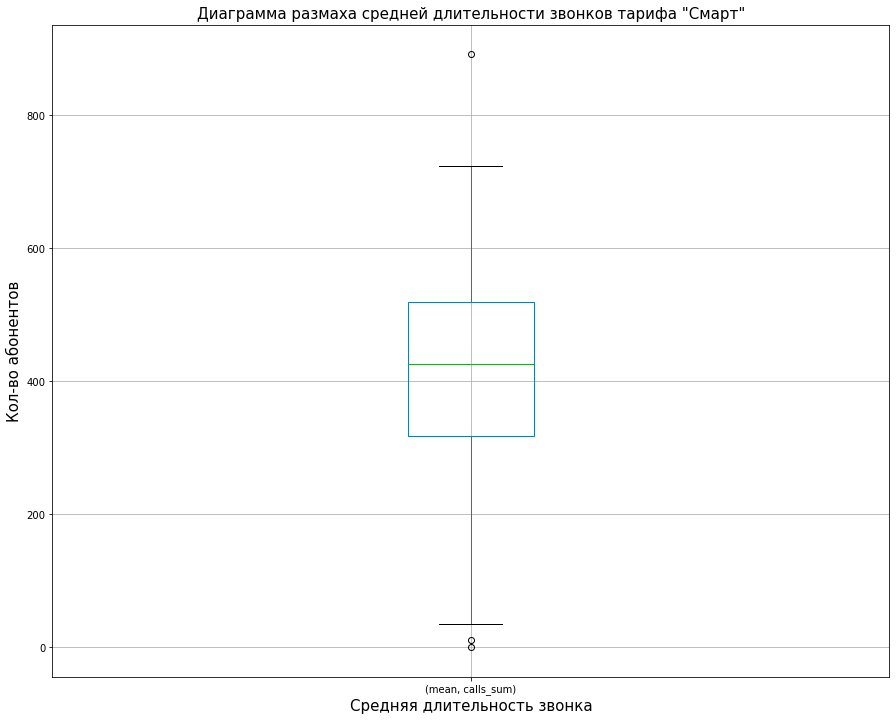

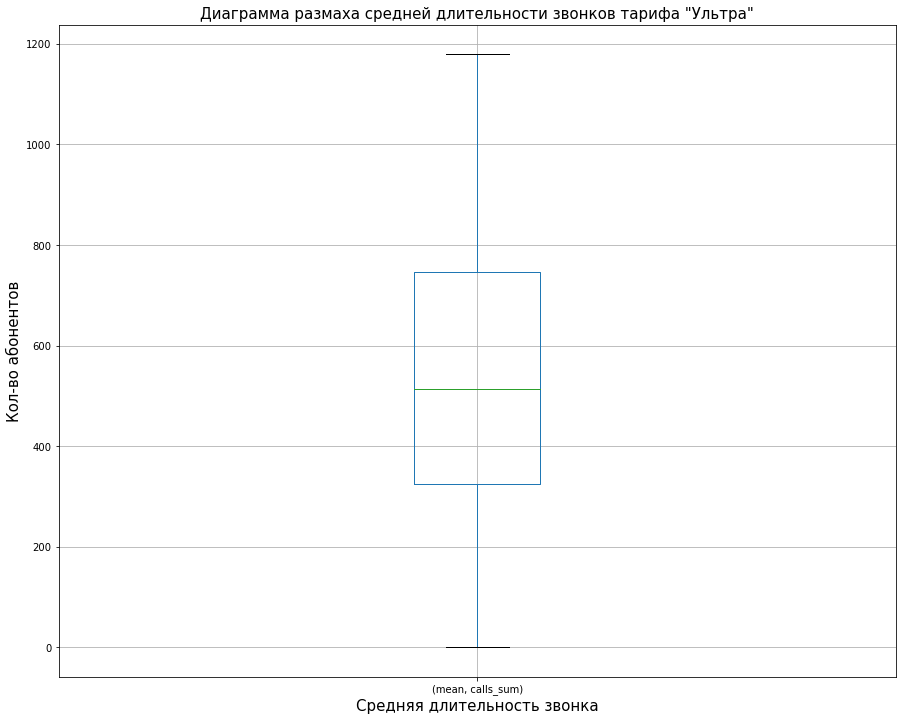

In [41]:
smart_mean_calls.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха средней длительности звонков тарифа "Смарт"', loc='center', fontsize = '15')
plt.xlabel('Средняя длительность звонка', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_mean_calls.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха средней длительности звонков тарифа "Ультра"', loc='center', fontsize = '15')
plt.xlabel('Средняя длительность звонка', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

На диаграммах мы видим подтверждение ранее сделаным выводам по поведению абонентов. В тарифе **smart** абоненты могу выходить за пределы отведенных в тарифе минут, а вот абоненты тарифа **ultra** не выходят за рамки своего тарифа по звонкам.

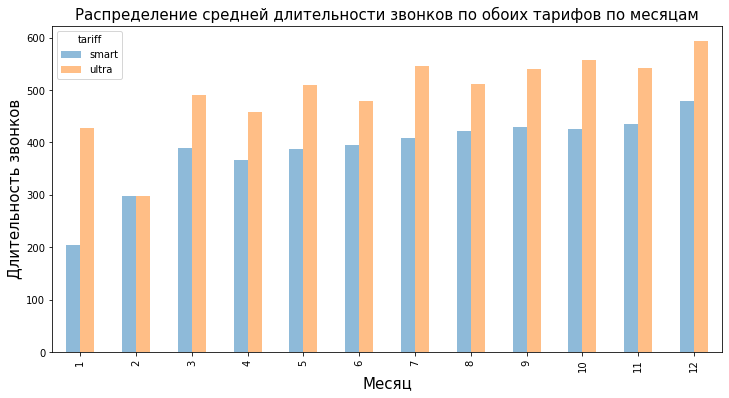

In [42]:
df.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean').T.plot(
    kind='bar', alpha=0.5, figsize=(12, 6))
plt.title('Распределение средней длительности звонков по обоих тарифов по месяцам', loc='center', fontsize = '15')
plt.xlabel('Месяц', size = 15) 
plt.ylabel('Длительность звонков', size = 15)
plt.show()

На данном распределении мы видим отчетливый "просадок" активности в звонках абонентов в первые месяца года, уже с марта значение держатся на другом уровне. В среднем по обоим тарифам кол-во звонков в среднем по абонентам не превышает 600. В тарифе **smart** не привешает значения 500. Исходя из этих данных можно сказать следующиее, что для тарифа **smart** верно выявлен лимит пакета минут, а вот пакет минут для тарифа **ultra** стоит пересмотреть так как ни один из абонентов так и не добрался до середины пакета.

,mean
,messages_count
count,350.000000
mean,32.352078
std,26.512448
min,0.000000
25%,11.000000
50%,27.750000
75%,48.000000
max,118.000000


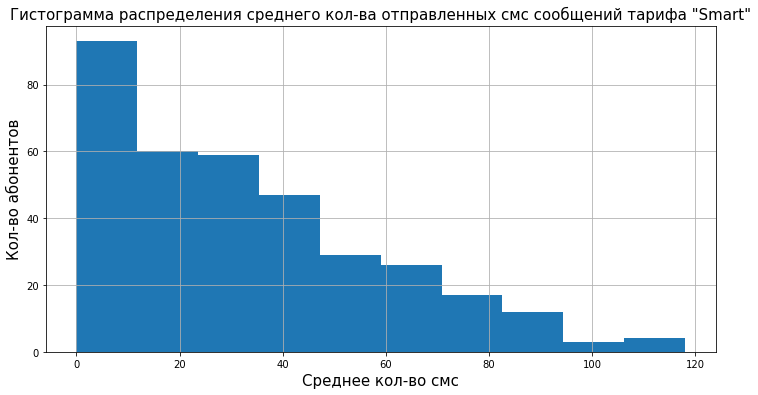

,mean
,messages_count
count,148.000000
mean,54.030743
std,46.366246
min,0.000000
25%,17.000000
50%,45.500000
75%,84.250000
max,192.000000


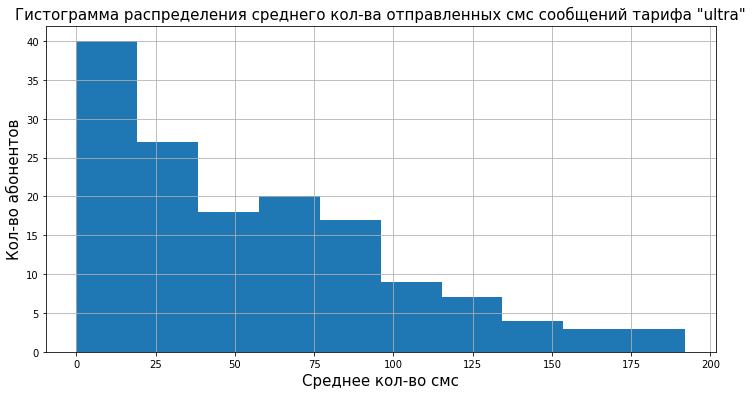

In [43]:
smart_mean_messages = smart.pivot_table(index = 'user_id', values = 'messages_count', aggfunc = ['mean'] )
display(smart_mean_messages.describe())
smart_mean_messages.hist(bins=10, figsize=(12, 6))
plt.title('Гистограмма распределения среднего кол-ва отправленных смс сообщений тарифа "Smart"', loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во смс', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_mean_messages = ultra.pivot_table(index = 'user_id', values = 'messages_count', aggfunc = ['mean'] )
display(ultra_mean_messages.describe())
ultra_mean_messages.hist(bins=10, figsize=(12, 6))
plt.title('Гистограмма распределения среднего кол-ва отправленных смс сообщений тарифа "ultra"', loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во смс', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()


Ситуация с смс сообщениями показывает, что в 2021 году доминирую мессенджеры. Смс сообщения уже становятся пережитном прошлого, поэтому, что в тарифе **smart**, что в тарифе **ultra** количество использованых смс очень мало. Хотя в отличии от тарифа **ultra**, абоненты тарифа **smart**, все еще могут выходить за пределы тарифа по смс сообщениям. Пиковые значения в обоих тарифах находятся в районе нуля.

Гистограммы среднего количества смс сообщений похожи на нормальное распределение.

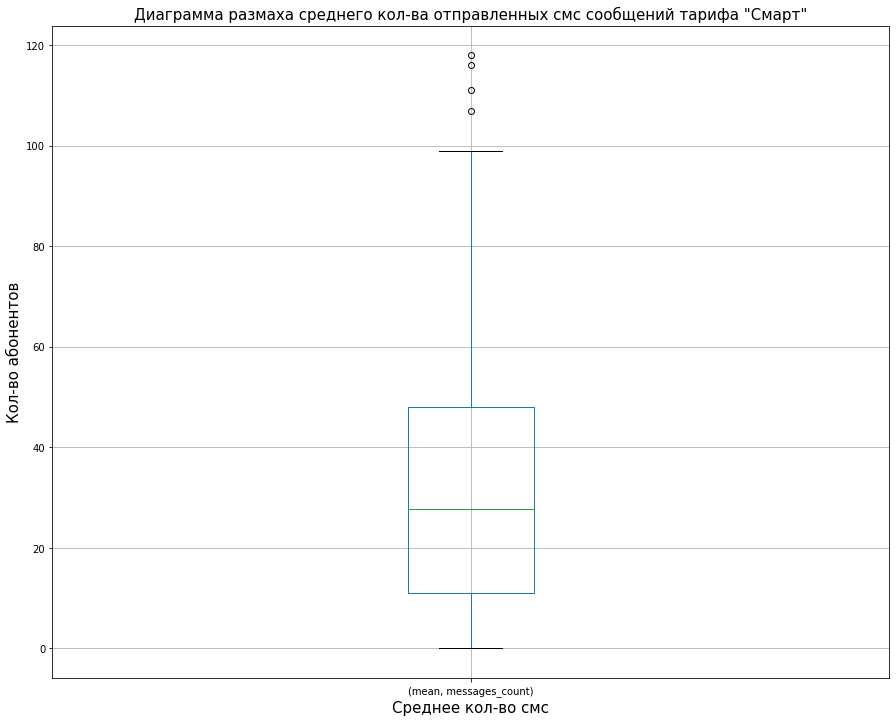

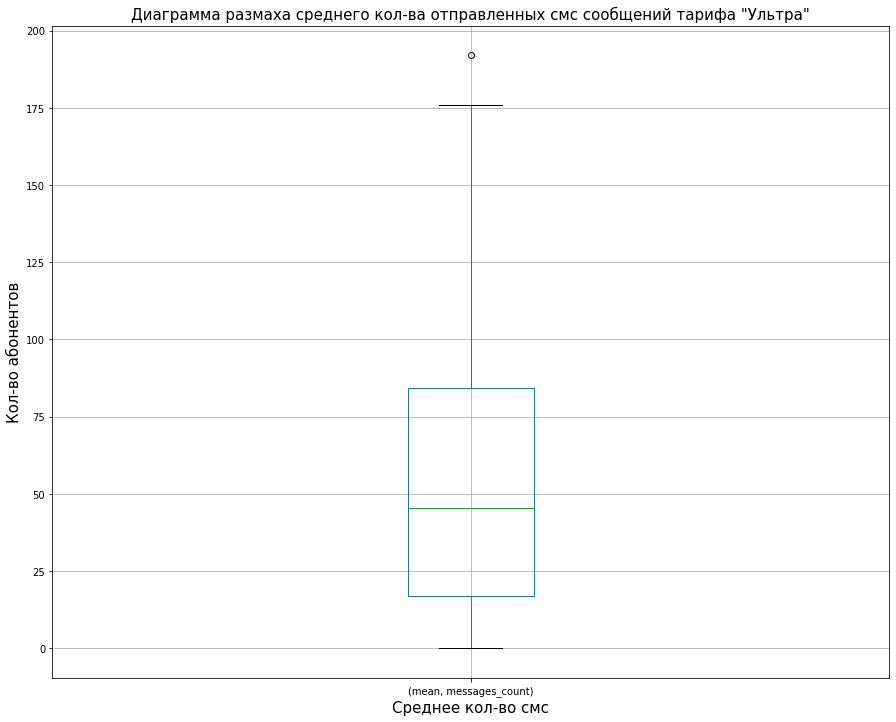

In [44]:
smart_mean_messages.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха среднего кол-ва отправленных смс сообщений тарифа "Смарт"', loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во смс', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_mean_messages.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха среднего кол-ва отправленных смс сообщений тарифа "Ультра"', loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во смс', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

Как и со звонками, диарамма размаха подтвержданет ранее сделаные нами выводы.

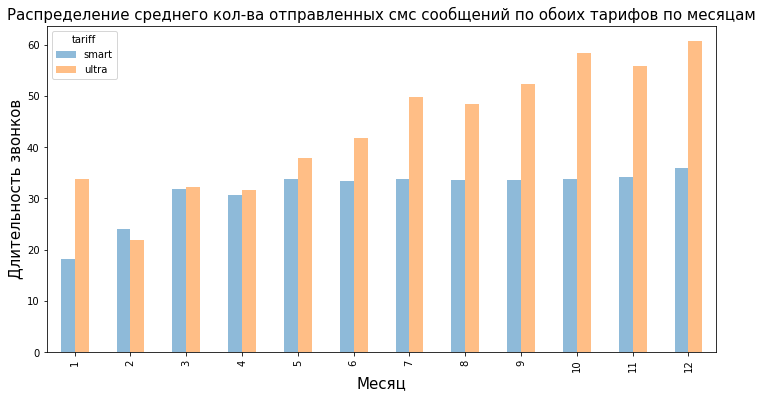

In [45]:
df.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean').T.plot(
    kind='bar', alpha=0.5, figsize=(12, 6))
plt.title('Распределение среднего кол-ва отправленных смс сообщений по обоих тарифов по месяцам', loc='center', fontsize = '15')
plt.xlabel('Месяц', size = 15) 
plt.ylabel('Длительность звонков', size = 15)
plt.show()

Эх, смс сообщения покидают нашу жизнь... В перывые два месяца года у нас снова самые минимальные значения, в марте начинается рост как это было и со звонками. Абоненты тарифа **smart** в среднем отправляют не более 40 смс, а вот абоненты тафира **ultra** не более 60 смс. Сделаю свое предположение, что кол-во лимита в тарифе смарт было определено верно, абоненты не нужно более 50 смс сообщений в месяц.

,mean
,gb_sum
count,350.000000
mean,16.341786
std,3.507441
min,5.727273
25%,14.000000
50%,16.333333
75%,18.744318
max,27.375000


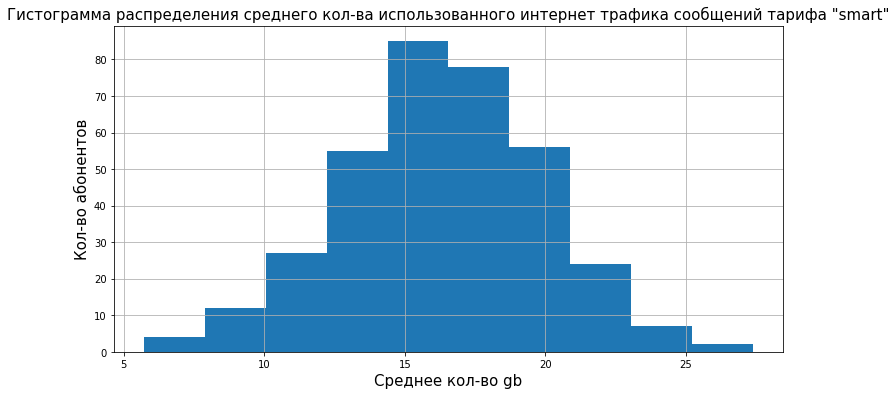

,mean
,gb_sum
count,148.000000
mean,19.617273
std,8.120776
min,0.000000
25%,14.727273
50%,18.800000
75%,25.750000
max,38.500000


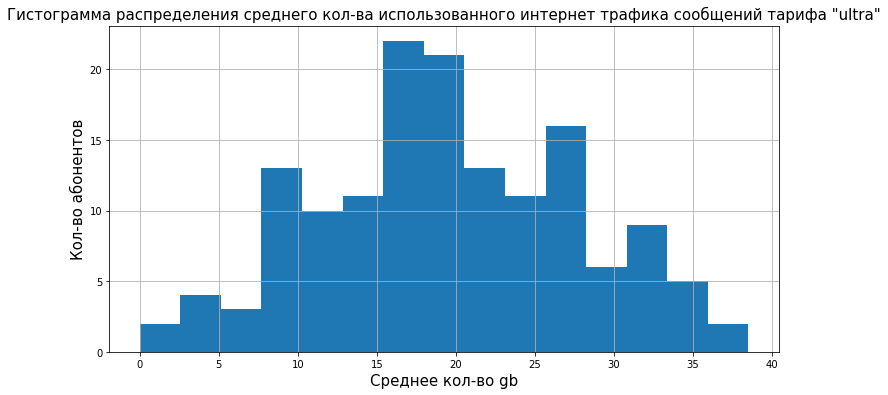

In [46]:
smart_mean_internet = smart.pivot_table(index = 'user_id', values = 'gb_sum', aggfunc = ['mean'] )
display(smart_mean_internet.describe())
smart_mean_internet.hist(bins=10, figsize=(12, 6))
plt.title('Гистограмма распределения среднего кол-ва использованного интернет трафика сообщений тарифа "smart"',
          loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во gb', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_mean_internet = ultra.pivot_table(index = 'user_id', values = 'gb_sum', aggfunc = ['mean'] )
display(ultra_mean_internet.describe())
ultra_mean_internet.hist(bins=15, figsize=(12, 6))
plt.title('Гистограмма распределения среднего кол-ва использованного интернет трафика сообщений тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во gb', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()


В использовании интернета, у нас совсем другая картина. Абоненты тарифа **smart** в среднем использую примерно 16 Гб интернет трафика, что выходит за пределы лимимита тарифа.
А вот у абонентов тарифа **ultra** пиковое значение в районе 19 Гб , получаться в среднем у абонентов этого тарифа в запасе на месяц остается 10 Гб.
Гистрограммы распределены нормально. У тарифа **smart** гистограмма скошена вправо.

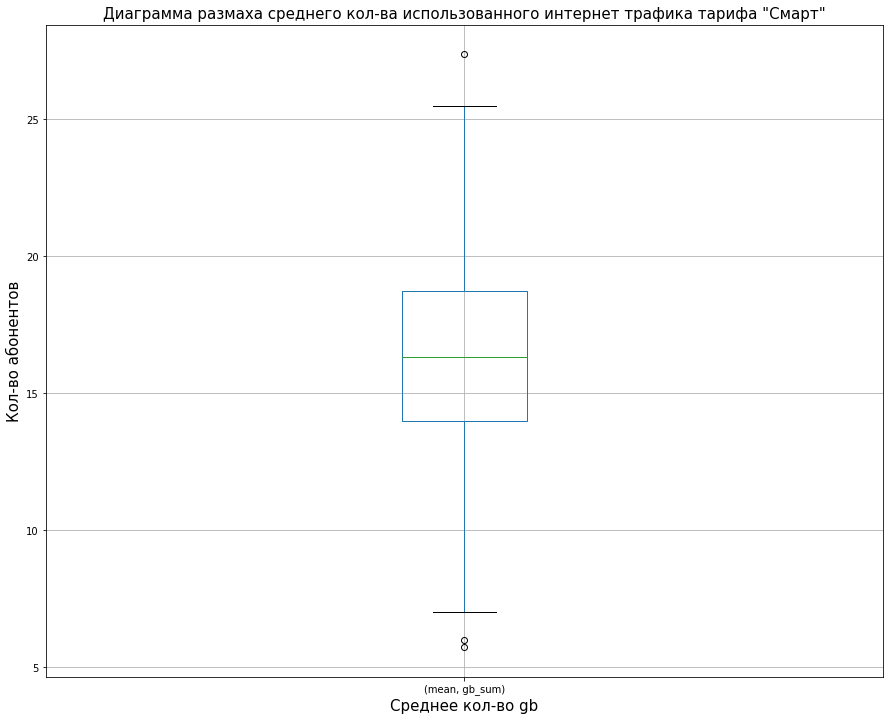

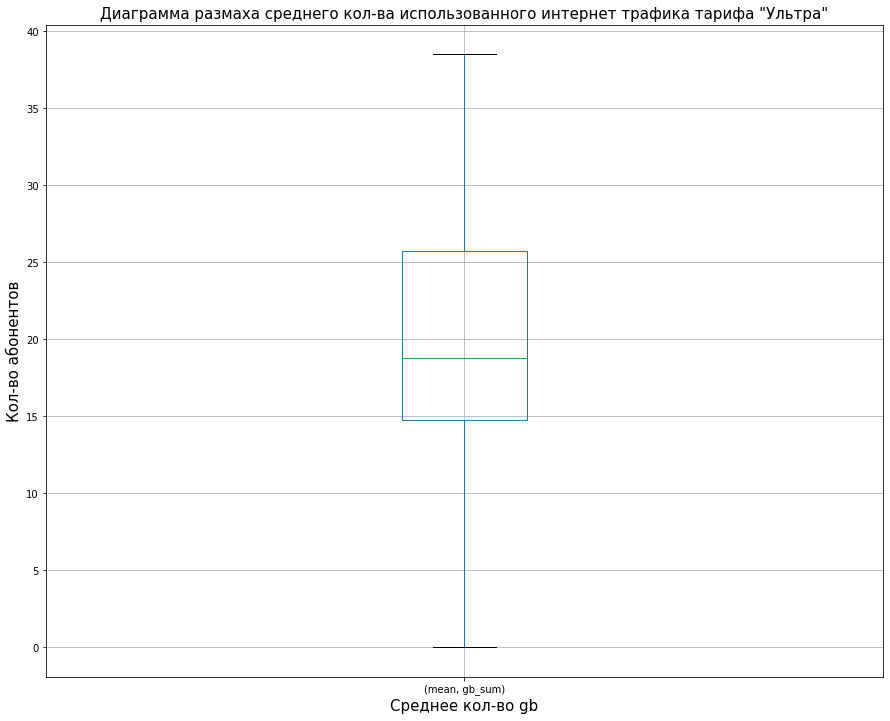

In [47]:
smart_mean_internet.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха среднего кол-ва использованного интернет трафика тарифа "Смарт"', loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во gb', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_mean_internet.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха среднего кол-ва использованного интернет трафика тарифа "Ультра"', loc='center', fontsize = '15')
plt.xlabel('Среднее кол-во gb', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

В отличии от тарифа **ultra** в тарифе **smart** мы видим выбросы за пределы 3-х сигм. В тарифе **smart** у нас есть выбросы, где абоненты не пользуются интернетом, или используют его в малом количестве.

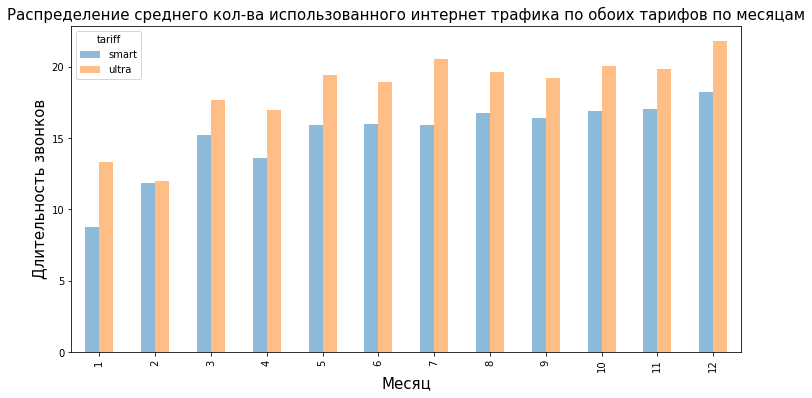

In [48]:
df.pivot_table(index='tariff', columns='month', values='gb_sum', aggfunc='mean').T.plot(
    kind='bar', alpha=0.5, figsize=(12, 6))
plt.title('Распределение среднего кол-ва использованного интернет трафика по обоих тарифов по месяцам',
          loc='center', fontsize = '15')
plt.xlabel('Месяц', size = 15) 
plt.ylabel('Длительность звонков', size = 15)
plt.show()

На этом этапе мы уже можем сделать следующий вывод. Первые месяца года самые провальные. Как и со звонками и с смс сообщениями в январе и феврале мы видим самые минимальные значения. А в марте у нас снова рост. В вреднем абоненты по обоим тарифам не используют более 40 Гб интернет трафика. Возможно стоит пересмотреть лимит для тарифа **smart**.

,std
,calls_sum
count,323.000000
mean,135.175988
std,99.584220
min,0.000000
25%,74.701542
50%,112.286142
75%,154.611448
max,768.625071


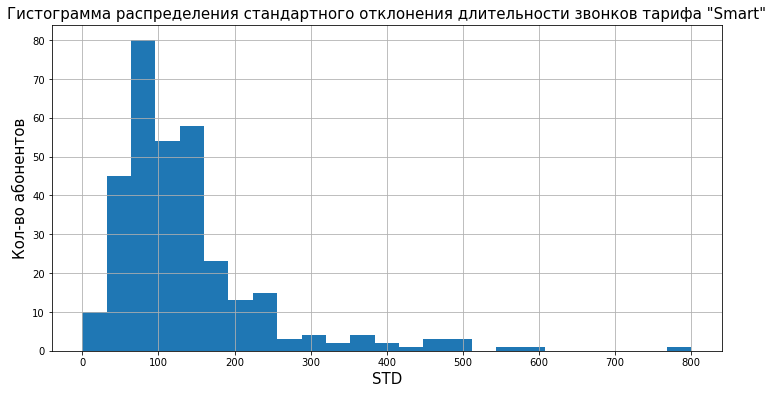

,std
,calls_sum
count,141.000000
mean,162.391295
std,139.450900
min,0.000000
25%,69.711255
50%,124.236181
75%,212.260519
max,956.715475


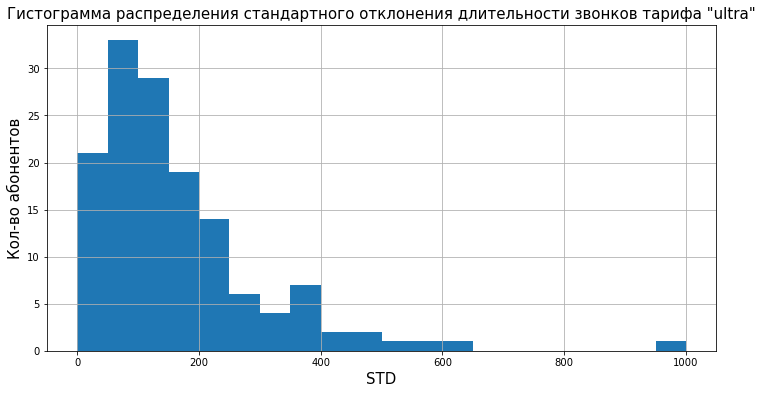

In [49]:
smart_std_calls = smart.pivot_table(index = 'user_id', values = 'calls_sum', aggfunc = ['std'] )
display(smart_std_calls.describe())
smart_std_calls.hist(bins=25, range=(0, 800), figsize=(12, 6))
plt.title('Гистограмма распределения стандартного отклонения длительности звонков тарифа "Smart"',
          loc='center', fontsize = '15')
plt.xlabel('STD', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

ultra_std_calls = ultra.pivot_table(index = 'user_id', values = 'calls_sum', aggfunc = ['std'] )
display(ultra_std_calls.describe())
ultra_std_calls.hist(bins=20, range=(0, 1000), figsize=(12, 6))
plt.title('Гистограмма распределения стандартного отклонения длительности звонков тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('STD', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

Теперь рассмотрим гистограммы стандартного отклонения. В тарифе **smart** стандарнтое отклонение у нас примерно 100, а в тарифе **ultra** 140. Это означается, что абоненты тарифа **ultra** с большей вероятностью будут говорить по телефому более среднего значения.

,std
,messages_count
count,323.000000
mean,9.575060
std,9.508602
min,0.000000
25%,3.245872
50%,7.071068
75%,13.136040
max,54.641559


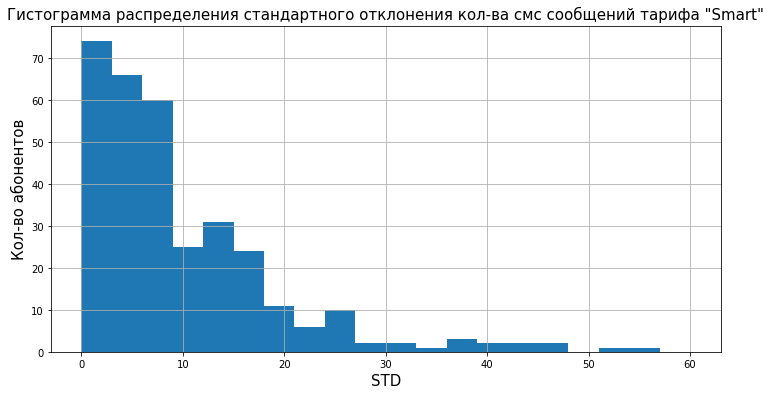

,std
,messages_count
count,141.000000
mean,15.017838
std,15.529342
min,0.000000
25%,4.082483
50%,9.899495
75%,23.021729
max,81.926797


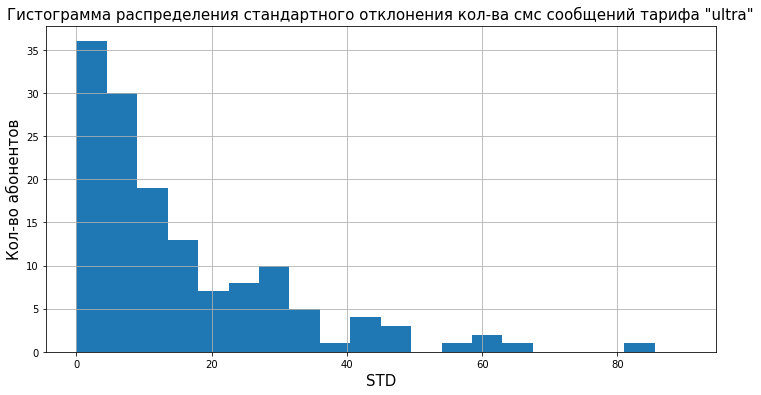

In [50]:
smart_std_messages = smart.pivot_table(index = 'user_id', values = 'messages_count', aggfunc = ['std'] )
display(smart_std_messages.describe())
smart_std_messages.hist(bins=20, range=(0, 60), figsize=(12, 6))
plt.title('Гистограмма распределения стандартного отклонения кол-ва смс сообщений тарифа "Smart"',
          loc='center', fontsize = '15')
plt.xlabel('STD', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

ultra_std_messages = ultra.pivot_table(index = 'user_id', values = 'messages_count', aggfunc = ['std'] )
display(ultra_std_messages.describe())
ultra_std_messages.hist(bins=20, range=(0, 90), figsize=(12, 6))
plt.title('Гистограмма распределения стандартного отклонения кол-ва смс сообщений тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('STD', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

Рассмотрим теперь гистограмму стандатного откланения для смс сообщения. В обоих тарифах мы видим явные пики в нуле, что и не удивительно в современном мире.

,std
,gb_sum
count,323.000000
mean,5.102361
std,3.491196
min,0.000000
25%,2.886751
50%,4.337993
75%,6.096432
max,24.041631


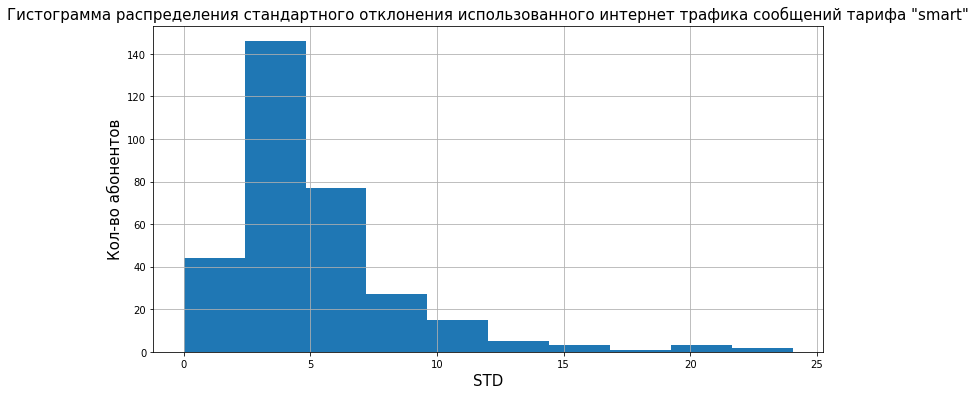

,std
,gb_sum
count,141.000000
mean,6.186881
std,4.039358
min,0.000000
25%,3.544949
50%,5.147815
75%,7.778175
max,21.213203


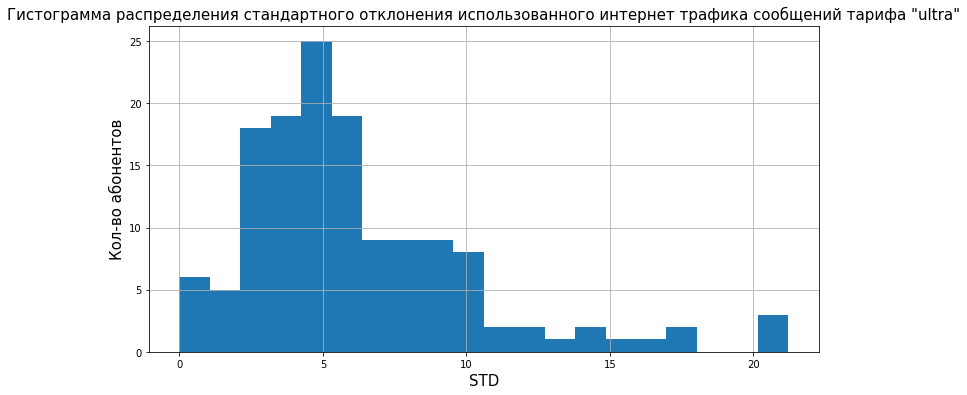

In [51]:
smart_std_internet = smart.pivot_table(index = 'user_id', values = 'gb_sum', aggfunc = ['std'] )
display(smart_std_internet.describe())
smart_std_internet.hist(bins=10, figsize=(12, 6))
plt.title('Гистограмма распределения стандартного отклонения использованного интернет трафика сообщений тарифа "smart"',
          loc='center', fontsize = '15')
plt.xlabel('STD', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_std_internet = ultra.pivot_table(index = 'user_id', values = 'gb_sum', aggfunc = ['std'] )
display(ultra_std_internet.describe())
ultra_std_internet.hist(bins=20, figsize=(12, 6))
plt.title('Гистограмма распределения стандартного отклонения использованного интернет трафика сообщений тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('STD', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

Рассмотрим гистограмму среднего отклонения по использованию интернет трафака. У тарифа **smart** оно немного больше чем у тарифа **ultra**, что означает, что вероятность отклонения от средних значений больше у тарифа **smart**.

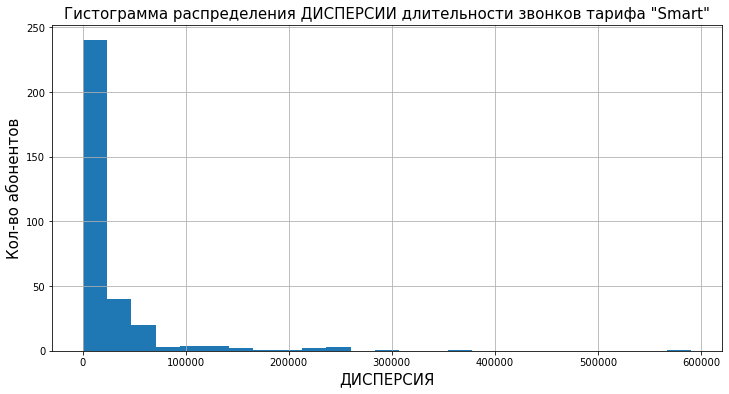

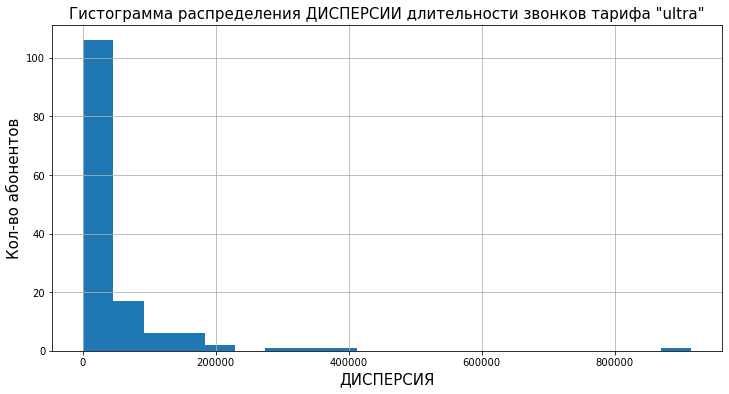

In [52]:
smart_var_calls = smart.pivot_table(index = 'user_id', values = 'calls_sum', aggfunc = ['var'] )
smart_var_calls.hist(bins=25, figsize=(12, 6))
plt.title('Гистограмма распределения ДИСПЕРСИИ длительности звонков тарифа "Smart"',
          loc='center', fontsize = '15')
plt.xlabel('ДИСПЕРСИЯ', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

ultra_var_calls = ultra.pivot_table(index = 'user_id', values = 'calls_sum', aggfunc = ['var'] )
ultra_var_calls.hist(bins=20, figsize=(12, 6))
plt.title('Гистограмма распределения ДИСПЕРСИИ длительности звонков тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('ДИСПЕРСИЯ', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

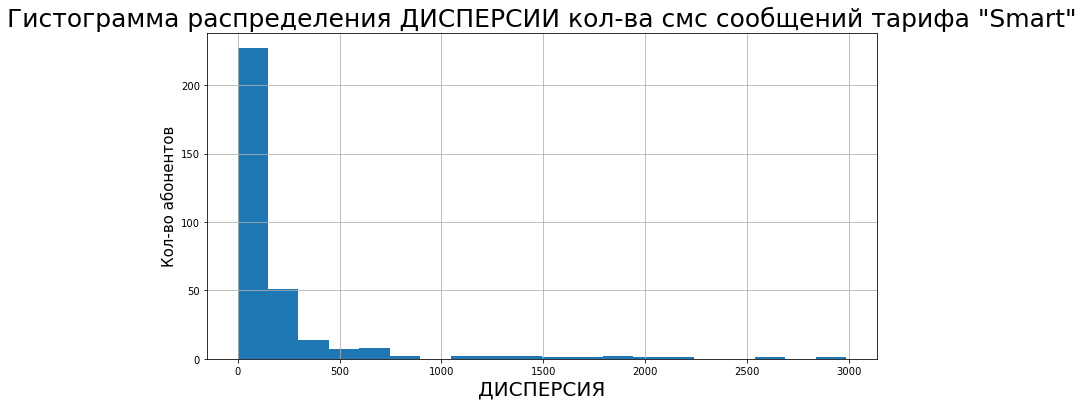

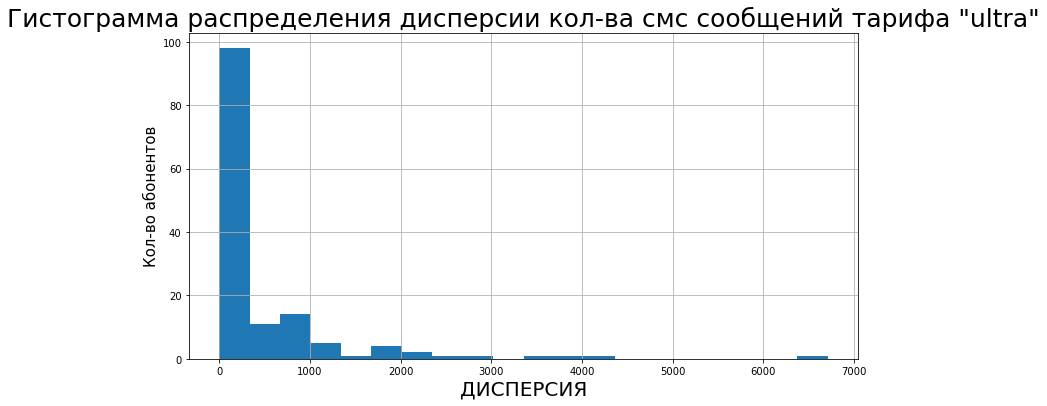

In [53]:
smart_var_messages = smart.pivot_table(index = 'user_id', values = 'messages_count', aggfunc = ['var'] )
smart_var_messages.hist(bins=20, figsize=(12, 6))
plt.title('Гистограмма распределения ДИСПЕРСИИ кол-ва смс сообщений тарифа "Smart"',
          loc='center', fontsize = '25')
plt.xlabel('ДИСПЕРСИЯ', size = 20)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

ultra_var_messages = ultra.pivot_table(index = 'user_id', values = 'messages_count', aggfunc = ['var'] )
ultra_var_messages.hist(bins=20, figsize=(12, 6))
plt.title('Гистограмма распределения дисперсии кол-ва смс сообщений тарифа "ultra"',
          loc='center', fontsize = '25')
plt.xlabel('ДИСПЕРСИЯ', size = 20)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

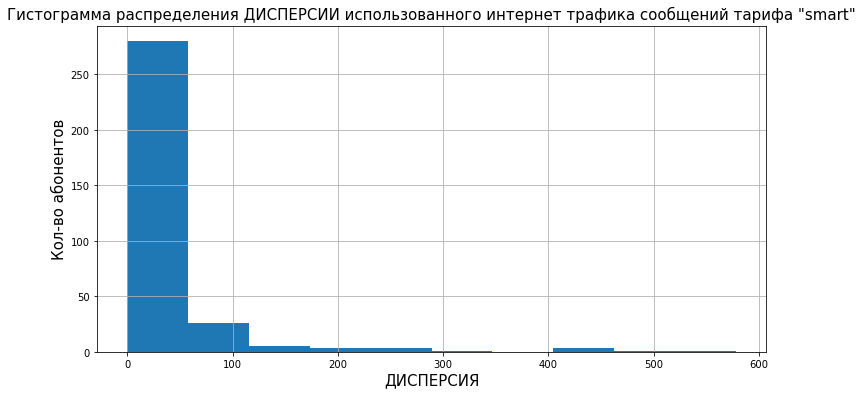

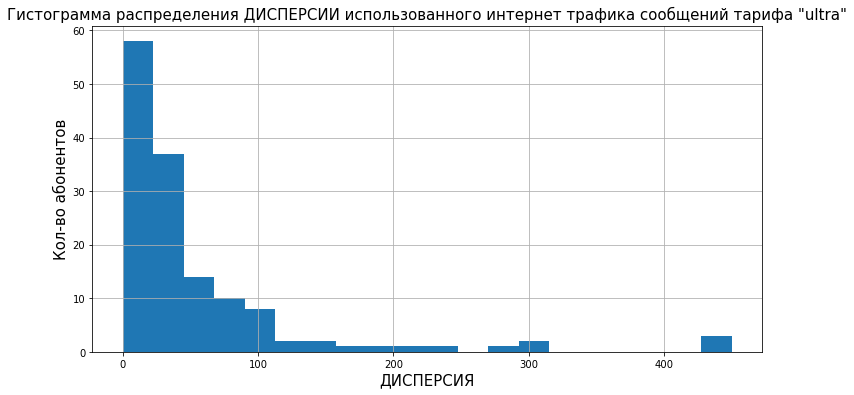

In [54]:
smart_var_internet = smart.pivot_table(index = 'user_id', values = 'gb_sum', aggfunc = ['var'] )
smart_var_internet.hist(bins=10, figsize=(12, 6))
plt.title('Гистограмма распределения ДИСПЕРСИИ использованного интернет трафика сообщений тарифа "smart"',
          loc='center', fontsize = '15')
plt.xlabel('ДИСПЕРСИЯ', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()
ultra_var_internet = ultra.pivot_table(index = 'user_id', values = 'gb_sum', aggfunc = ['var'] )
ultra_var_internet.hist(bins=20, figsize=(12, 6))
plt.title('Гистограмма распределения ДИСПЕРСИИ использованного интернет трафика сообщений тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('ДИСПЕРСИЯ', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

В трех случаях, что со звонками, что с смс сообщениями, что с интернет трафиком среднеквадратичное отклонение у нас большее значение принимает в районе нуля. Возможно это обусловлено тем, что есть абоненты, которые не использует какие-либо опции из своего тарифа(минуты, смс сообщения, интернет трафик).

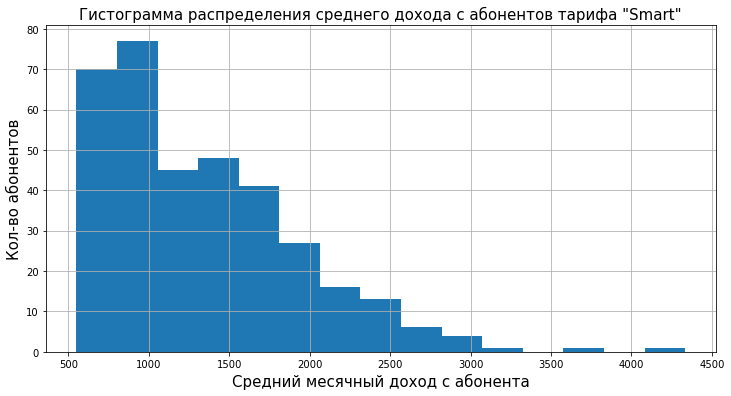

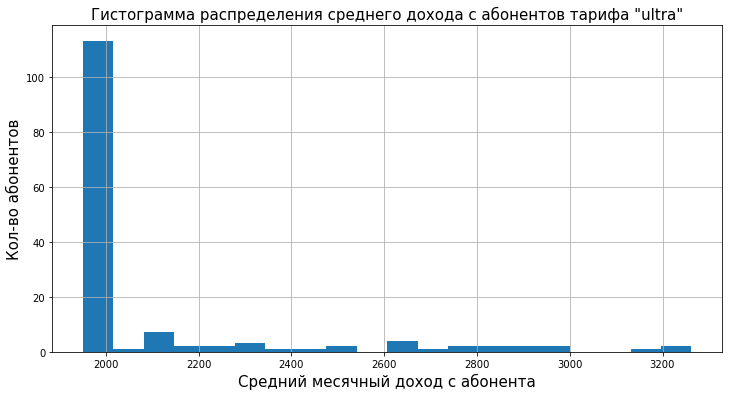

In [55]:
smart_mean_income = smart.pivot_table(index = 'user_id', values = 'income', aggfunc = ['mean'] )
smart_mean_income.hist(bins=15, figsize=(12, 6))
plt.title('Гистограмма распределения среднего дохода с абонентов тарифа "Smart"',
          loc='center', fontsize = '15')
plt.xlabel('Средний месячный доход с абонента', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

ultra_mean_income = ultra.pivot_table(index = 'user_id', values = 'income', aggfunc = ['mean'] )
ultra_mean_income.hist(bins=20, figsize=(12, 6))
plt.title('Гистограмма распределения среднего дохода с абонентов тарифа "ultra"',
          loc='center', fontsize = '15')
plt.xlabel('Средний месячный доход с абонента', size = 15)
plt.ylabel('Кол-во абонентов', size = 15)
plt.show()

Вот мы подобрались к самой интересной части. Из гистограммы мы четко видим, что тариф **smart** более выгодный, пиковое значение у нас первышает пиковое значение у тарифа **ultra**. Проверим это диаграммой размаха =)

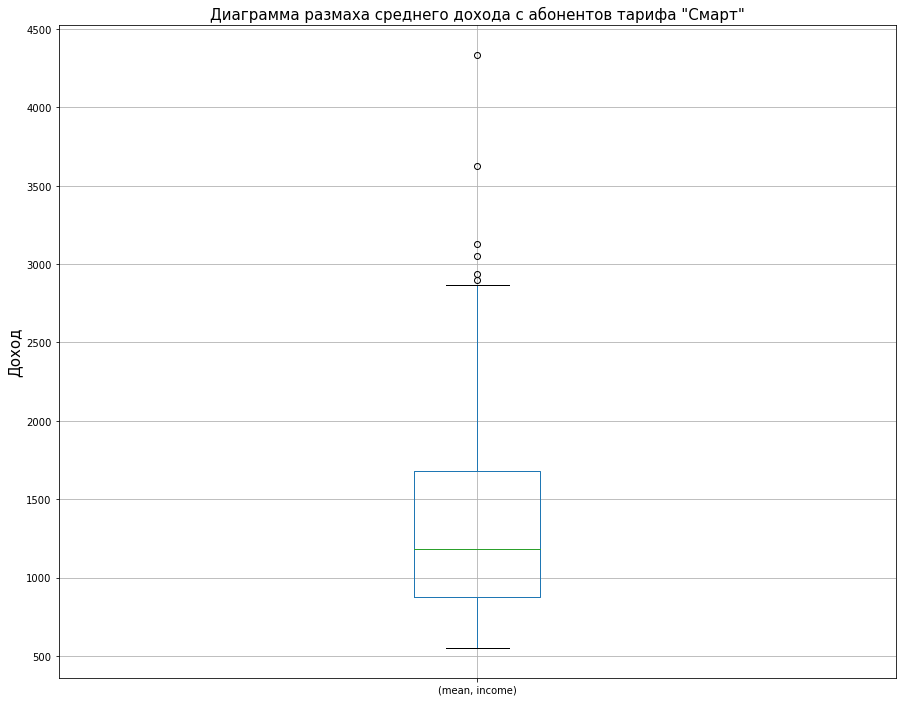

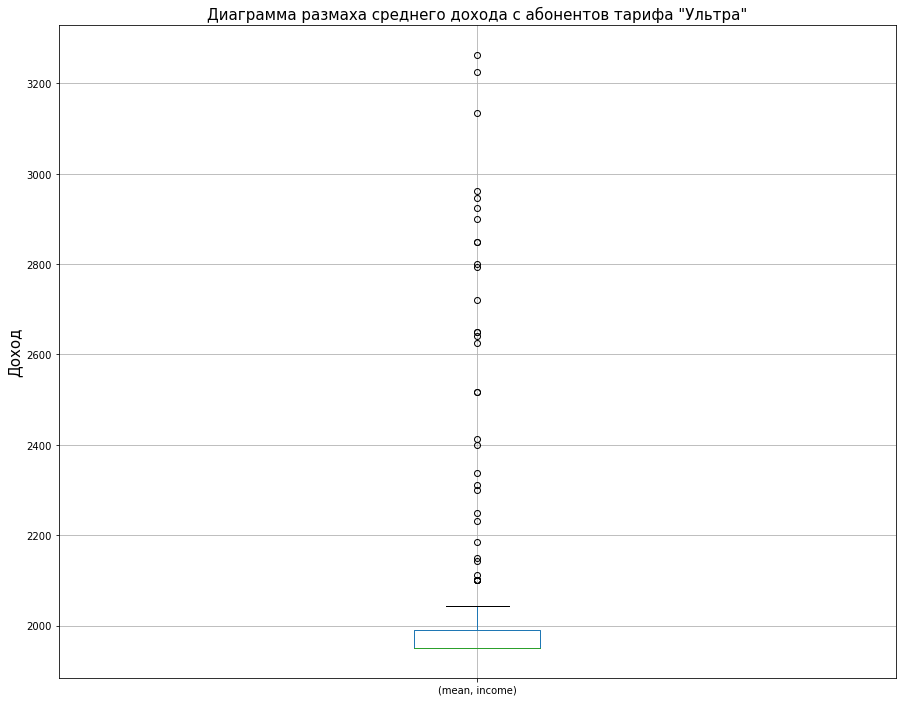

In [56]:
smart_mean_income.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха среднего дохода с абонентов тарифа "Смарт"', loc='center', fontsize = '15')
plt.ylabel('Доход', size = 15)
plt.show()
ultra_mean_income.boxplot(figsize = (15,12))
plt.title('Диаграмма размаха среднего дохода с абонентов тарифа "Ультра"', loc='center', fontsize = '15')
plt.ylabel('Доход', size = 15)
plt.show()

Диаграмма размаха подтверждает наше суждение, паразительно, но дешевый тариф приносит больше прибыли чем более дорогой тариф. Посмотрим, как у нас обстоят дела по самым доходным месяцам

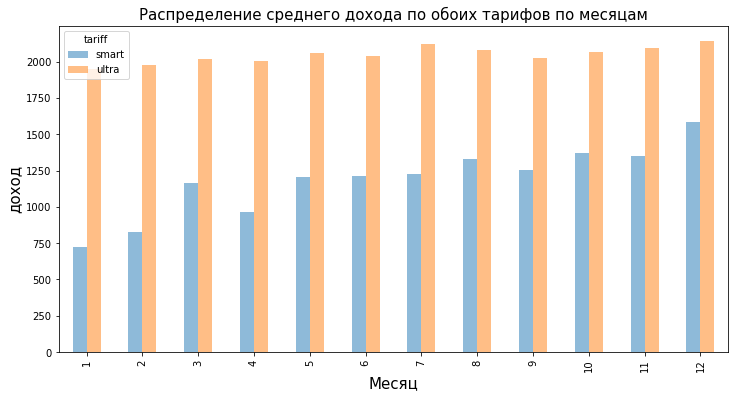

In [57]:
df.pivot_table(index='tariff', columns='month', values='income', aggfunc='mean').T.plot(
    kind='bar', alpha=0.5, figsize=(12, 6))
plt.title('Распределение среднего дохода по обоих тарифов по месяцам',
          loc='center', fontsize = '15')
plt.xlabel('Месяц', size = 15) 
plt.ylabel('доход', size = 15)
plt.show()

Интересная у нас ситуация. Абоненты тарифа **ultra** в среднем почти не выходят за абоненскую плату тарифа. А вот абоненты тарифа **smart** каждый месяц в стреднем тратят почти 3 месячные абоненские платы. 

In [58]:
total_table = df.pivot_table(index='tariff', values=['calls_sum', 'gb_sum', 'messages_count','income'], \
                             aggfunc=['mean', 'std', 'var']).reset_index()
total_table = total_table.round(1)
total_table.columns
display(total_table)

tariff      mean                                     std                \
         calls_sum gb_sum  income messages_count calls_sum gb_sum income   
0  smart     417.9   16.4  1294.6           33.4     190.3    5.8  820.9   
1  ultra     526.6   19.5  2071.1           49.4     317.6    9.9  378.8   

                       var                                  
  messages_count calls_sum gb_sum    income messages_count  
0           28.2   36219.3   33.2  673931.3          796.8  
1           47.8  100873.6   97.3  143491.2         2285.3

# Шаг 4. Проверка гипотез

Проверим следующие гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

**Гипотеза 1**
Средняя выручка пользователей тарифов различается. Величину значимости возьмем 5%.

Сформируем более точно нашу гипотезу:
* Нулевая гипотеза  - средняя выручка с пользователей тарифов не различается, тоесть равна.
* Обратная гипотеза - средняя выручка с пользователей тарифов различается, тоесть не равна.

In [44]:
alpha = 0.05

results = st.ttest_ind(smart['income'], ultra['income'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отклонить нулевую гипотезу")

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


По результатам вычисления мы отвергаем нулевую гипотезу, что средняя выручка с пользователей тарифов **smart** и **ultara** равны. Значит мы можем предположить, что верна обратная гипотеза - средняя выручка с пользователей тарифов различается. Посмотрим на сколько

In [45]:
df.pivot_table(index='tariff', values='income', aggfunc=['mean'])

,mean
,income
tariff,
smart,1294.63930
ultra,2071.06599


Тариф **smart** в среднем приносит прибиль не только с абоненской платы. А вот абоненты тарифа **ultra** в среднем почти не выходят за пределы абоненской платы своего тарифа.

**Гипотеза 2** Средняя выручка с пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем более точна нашу гипотезу:
* Нулевая гипотеза - средняя выручка с абонентов из Москвы равна со средней выручкой абонентов из других регионов
* Обратная гипотеза - средняя выручка с абонентов из Москвы отличается от выручки абонентов из других регионов 

In [46]:
moscow = df.query('city == "Москва"')
region = df.query('city != "Москва"')

alpha = 0.05

results = st.ttest_ind(moscow['income'], region['income'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отклонить нулевую гипотезу")

p-значение: 0.531666503831252
Нет оснований отклонить нулевую гипотезу


По результатам вычислений у нас нет оснований отвергнуть нулевую гипотезу, поэтому у нас есть все основания полагать, что средняя выручка с абонентов из Москвы равна средней выручке абонентов с регионов.

# 5 Вывод

Вернемся к поставленному перед нами вопросу. Для компании "Мегалайн" выгоднее провести большую рекламную компанию тарифа **smart**, так как это дешевый сегмент тарифов, оператор сможет привлечь большее количество новых абонентов, тем самым увеличив свою годовую прибыль. Тариф **smart** выгоднее для компании по следующим причина:
* относительно низная цена для нового пользователя
* абоненты тарифа **smart** с большей вероятноностью превышают средние показатели по лимитам тарифа

 
 
 Также мы виявили, что абонеты тарифа **smart** с большей вероятностью расходую больше интернет трафика из своего пакета, и на этом строиться основная часть прибыли.
Рекомендации для оператора "Мегалайн":
* пересмотреть условия тарифа **ultra** по пакетам минут, смс.
* изменить подход к рекламной компании, разместить больше рекламного трафика в регионы, так как там меньше конкуренции по сравнению с Москвой
